In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#vamos a hacer la descomposicion dinamica
import h5py
import rotation as rot
import numpy as np

a0=1
vector = (1,2,4)

#snapshot = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')

#for j in range(len(snapshot)-1,len(snapshot)-2,-1):
    #print j, snapshot[j]
#snap = h5py.File('../outputs/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
snap = h5py.File('../outputs2/snap_1024.h5py', 'r')

for i in range(2,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    masa_str = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
    masa_gas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
    masa_drk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]-cm[0]
    ystr = pstr[:,1]-cm[1]
    zstr = pstr[:,2]-cm[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]-cm[0]
    ygas = pgas[:,1]-cm[1]
    zgas = pgas[:,2]-cm[2]
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]-cm[0]
    ydrk = pdrk[:,1]-cm[1]
    zdrk = pdrk[:,2]-cm[2]
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    vel_x = vel[:,0]
    vel_y = vel[:,1]
    vel_z = vel[:,2]

#----------------------------------------------
    r200 = r200*aexp
    rgal=0.15*r200

    limit = np.where(r<rgal)
    limit_str = np.where(r<r200)
    limit_gas = np.where(rgas<r200)
    limit_drk = np.where(rdrk<r200)

#-----------------para las veloc----------------------------------------------------
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc = np.cumsum((masa_str[limit])[r_indice])
    Mgal = Mc[-1]

    razon = Mc/Mgal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa]
    r50 = r_sort[cincuenta]
    
#----------componentes de la velocidad del centro de masa------------

    veloc,=np.where(r<r50[-1])

    vxcm = sum(masa_str[veloc]*vel_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*vel_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*vel_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = vel_x - vxcm
    vy = vel_y - vycm
    vz = vel_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])


# ------ posiciones y veloc rotadas de las estrellas -------------------------------------
    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    xn = xn[limit]
    yn = yn[limit]
    zn = zn[limit]
    v_x = vxn[limit]
    v_y = vyn[limit]
    v_z = vzn[limit]

# --------para la E potencial-----------------------------------------------
    x0 = xstr[limit]
    y0 = ystr[limit]
    z0 = zstr[limit]

    x_str = xstr[limit_str]
    y_str = ystr[limit_str]
    z_str = zstr[limit_str]

    x_gas = xgas[limit_gas]
    y_gas = ygas[limit_gas]
    z_gas = zgas[limit_gas]

    x_drk = xdrk[limit_drk]
    y_drk = ydrk[limit_drk]
    z_drk = zdrk[limit_drk]

    m0 = masa_str[limit]
    masa_str = masa_str[limit_str]
    masa_gas = masa_gas[limit_gas]
    masa_drk = masa_drk[limit_drk]

    num = len(x0)
    num_str = len(x_str)
    num_gas = len (x_gas)
    num_drk = len (x_drk)

#------Energía Cinética-------------------------------
    K = (1./2)*(v_x**2+v_y**2+v_z**2)

    print num, num_str
    #print masa_str
    #print r200
    #print aexp

334443 350981


In [4]:
#calculamos la energia potencial

from energia_potencial import *

u_str = energia_potencial.ep_part(m0, masa_str, x0,y0,z0, x_str,y_str,z_str, num, num_str)
u_gas = energia_potencial.ep_part(m0, masa_gas, x0,y0,z0, x_gas,y_gas,z_gas, num, num_gas)
u_drk = energia_potencial.ep_part(m0, masa_drk, x0,y0,z0, x_drk,y_drk,z_drk, num, num_drk)

#print u_drk

d = np.ndarray([np.size(u_str),3])
d[:,0] = u_str
d[:,1] = u_gas
d[:,2] = u_drk
#np.savetxt('/z/dalgorry/datos_salida/energia_potencial4.dat', d, '%12.6f', '\t')

In [5]:
#-----------Energia total-------------------------------------
cm=np.loadtxt('/z/dalgorry/datos_salida/energia_potencial4.dat')
u_str = cm[:,0]
u_gas = cm[:,1]
u_drk = cm[:,2]

U = u_str + u_gas + u_drk
U = U/m0
e = K - U
#print len(e)
print K
print U

#------Momento angular---------------

Jz = xn*v_y - yn*v_x

print len(Jz), len(e)

[  3015.15917969  13499.31445312   5217.93261719 ...,   1210.02099609
   7252.49316406    913.50866699]
[ 57634.73566878  64383.31059446  48460.20593482 ...,  70017.67169986
  38136.70369336  69957.11064617]
334443 334443


In [6]:
import jc
jcir = jc.jcirc(e, Jz)

d2 = np.ndarray([np.size(e),3])
d2[:,0] = e
d2[:,1] = Jz
d2[:,2] = jcir
np.savetxt('/z/dalgorry/datos_salida/energ_jz_h4.dat', d2, '%12.6f', '\t')

Determining the local particle density...
-------------------------------------------------


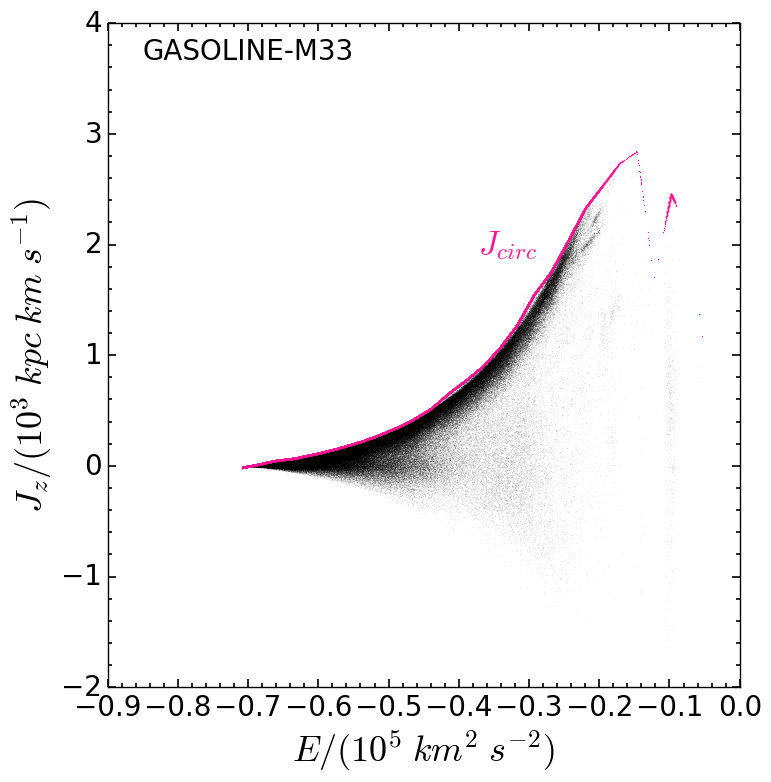

In [7]:
#Graficamos energia para galaxia 00
cm2=np.loadtxt('/z/dalgorry/datos_salida/energ_jz_h4.dat')
e = cm2[:,0]
jz = cm2 [:,1]
jcir = cm2[:,2]

fig=plt.figure(1, figsize=(8,8))
fig.savefig('/z/dalgorry/plots2/GS_M31_hcirc.png', dpi = 100)
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(e/1e5,jz/1e3,'.', markersize=0.05, color = 'k')
ax.plot(e/1e5,jcir/1e3,'.', markersize=0.8, color = 'deeppink')
ax.set_xlim(-0.9,0)
ax.set_ylim(-2,4)
#ax.set_title('Gasoline-M33', fontsize=22)
ax.set_xlabel(u'$E/(10^{5}\;km^{2}\;s^{-2})$', fontsize=26)
ax.set_ylabel(u'$J_{z}/(10^{3}\;kpc\;km\;s^{-1})$', fontsize=26)
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
plt.text(-0.7, 3.75, 'GASOLINE-M33', fontsize=20, color='k', ha='center', va='center')
plt.text(-0.33, 2, u'$J_{circ}$', fontsize=24, color='deeppink', ha='center', va='center')

fig.savefig('/z/dalgorry/plots2/GS_M33_EvsJz.png', dpi = 100)
#fig.savefig('/z/dalgorry/plots/M33_gs_EvsJz.png', dpi = 100)

#fig.savefig('/home/ornela/python/Graficos3/sh00_EvsJz.png', dpi = 100)
plt.show()

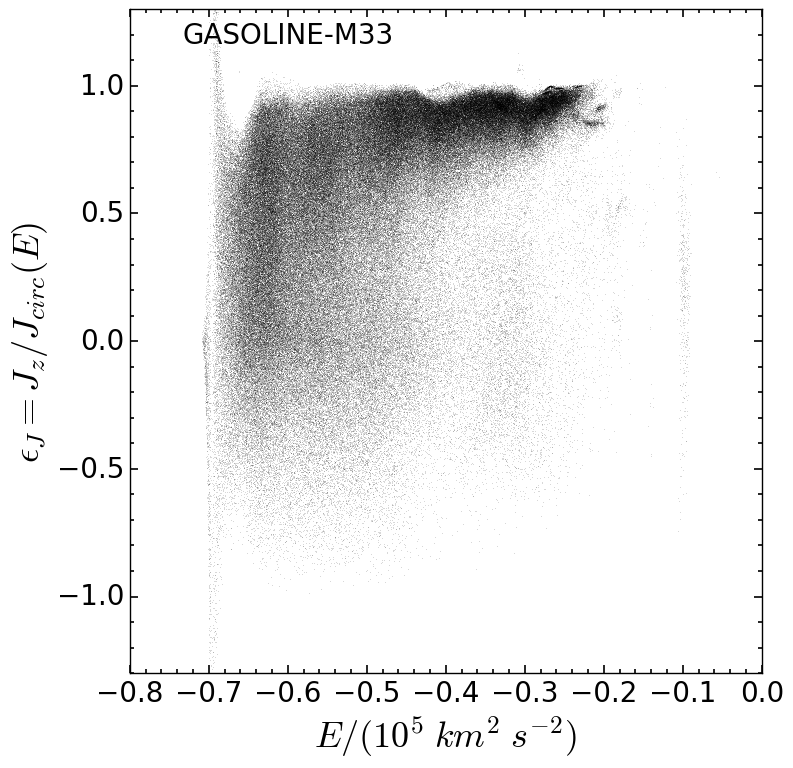

In [8]:
#circularidad para la galaxia 4
import matplotlib.patches as patches
cm2=np.loadtxt('/z/dalgorry/datos_salida/energ_jz_h4.dat')
e = cm2[:,0]
jz = cm2[:,1]
jcir = cm2[:,2]

circ = jz/jcir

e = e/1e5

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(e,circ,'.', markersize=0.1, color = 'k')
#ax.plot(e/1e5,jcir,'.', markersize=0.1, color = 'magenta')
ax.set_ylim(-1.3,1.3)
#ax.set_xlim(-0.7,0)
#ax.set_title('Gasoline-M33', fontsize=22)
ax.set_xlabel(u'$E/(10^{5}\;km^{2}\;s^{-2})$', fontsize=26)
ax.set_ylabel(u'$\epsilon_{J}=J_{z}/J_{circ}(E)$', fontsize=26)
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
plt.text(-0.6, 1.2, 'GASOLINE-M33', fontsize=20, color='k', ha='center', va='center')
'''ax.add_patch( patches.Rectangle( 
        (-0.85, 0.8), #(x,y)
        0.5, #ancho
        0.2, #alto
        fill=False, # remove background
        edgecolor='blue', linewidth=2))
ax.add_patch( patches.Rectangle( (-1.55, -0.3), 0.7, 1.1, fill=False, edgecolor='red', linewidth=2))
ax.add_patch( patches.Rectangle( (-0.8, -0.5), 0.5, 1.3, fill=False, edgecolor='green', linewidth=2))'''
#fig.savefig('/home/ornela/python/Graficos3/sh00_EvsCirc.png', dpi = 100)
#fig.savefig('/z/dalgorry/plots/M33_gs_EvsCirc.png', dpi = 100)
fig.savefig('/z/dalgorry/plots2/GS_M33_EvsCirc.png', dpi = 100)
plt.show()

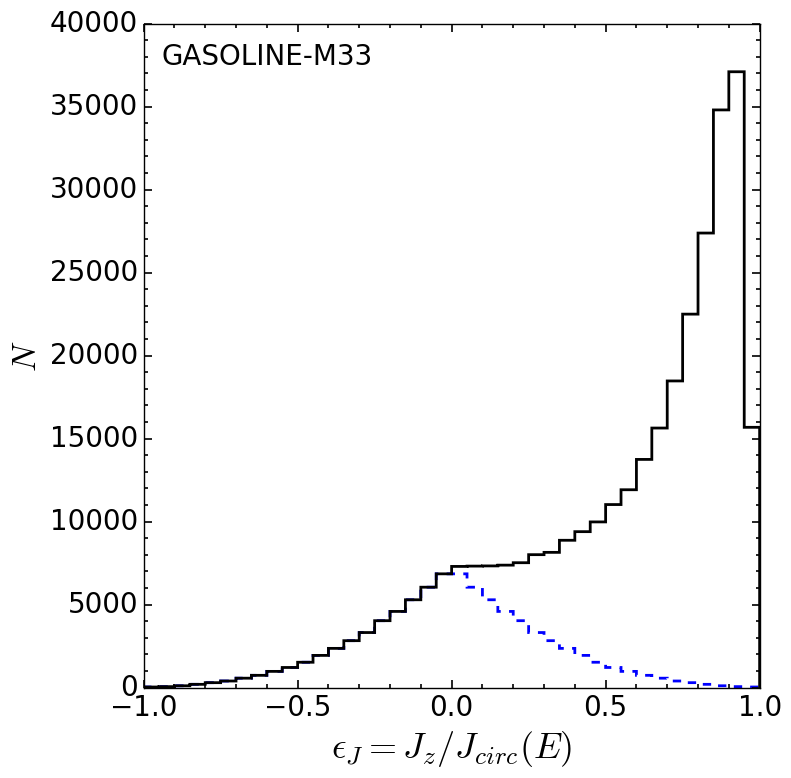

In [9]:
fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.18, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
bins = frange(-1,1,0.05)
bins2 = frange(0,1,0.05)
mask, = np.where(circ<0)
#circ2 = -circ[mask]
circ2 = np.append(-circ[mask],circ[mask])

plt.hist(circ2,bins, histtype='step',color='blue',linestyle='--', lw=2)
plt.hist(circ,bins, histtype='step',color='k', lw=2)
#ax.set_title('Gasoline - M33', fontsize=22)
ax.set_ylabel(u'$N$', fontsize=24)
ax.set_xlabel(u'$\epsilon_{J}=J_{z}/J_{circ}(E)$', fontsize=26)
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
plt.text(-0.6, 38000, 'GASOLINE-M33', fontsize=20, color='k', ha='center', va='center')
fig.savefig('/z/dalgorry/plots2/GS_M33_hcirc.png', dpi = 100)

'''ax=fig.add_subplot(212)
bins = frange(-1.8,0,0.05)
plt.hist(e,bins, histtype='step',color='k')
ax.set_ylabel(u'$N$', fontsize=24)
ax.set_xlabel(u'$E/(10^{5}\;km^{2}\;s^{-2})$', fontsize=24)
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')'''

plt.show()

In [3]:
import numpy as np

def conv(z, h, omega_lambda, omega_matter):

    H0=100*h
#conversion Mpc --> km
    conv1=1./(1e6*206265*1.496e8)
#conversion de s --> Gyr
    conv2=3600*24*365.25*1e9
    H0=H0*conv1*conv2

    c1=np.sqrt(omega_lambda*(1.+z)**(-3.))+np.sqrt((omega_lambda*(1.+z)**(-3.))+omega_matter)
    ln=np.log(c1/np.sqrt(omega_matter))
    c2=2./(3.*np.sqrt(omega_lambda))
        
    time = (1./H0)*c2*ln

    return time

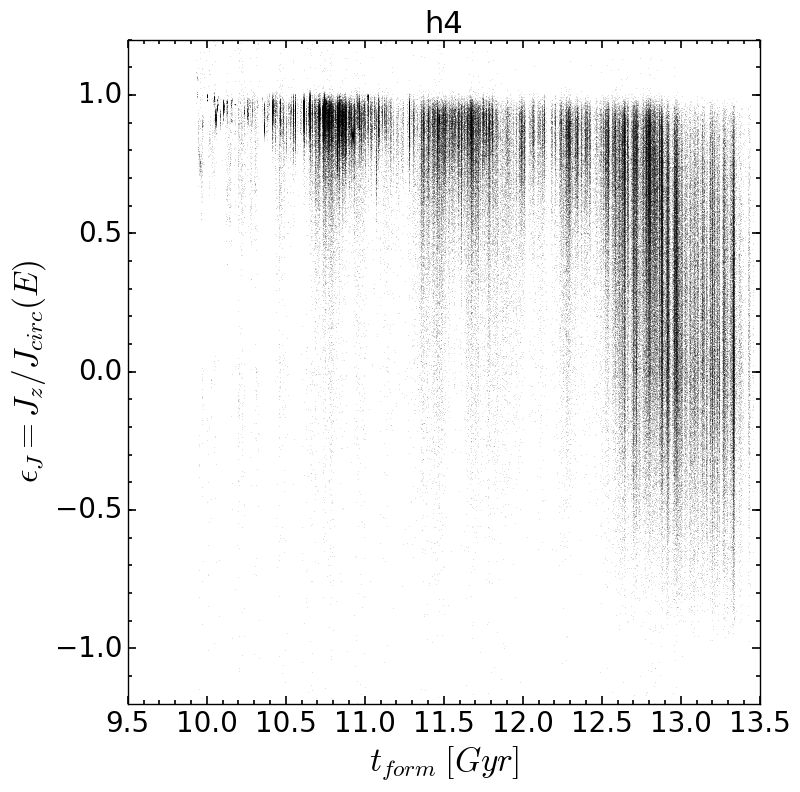

In [4]:
#tiempo de form vs circularidad
cm2=np.loadtxt('/z/dalgorry/datos_salida/energ_jz_h4.dat')
e = cm2[:,0]
jz = cm2[:,1]
jcir = cm2[:,2]

circ = jz/jcir

ftime = snap['subhalo_004/Str/FormationTime'].value

#print len(ftime[limit])
ftime = ftime[limit]
z = ftime

tform = conv(z, h, omega_lambda, omega_matter)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(tform,circ,'.', markersize=0.08, color = 'k')
#ax.plot(tform_,circularidad,'.', markersize=0.08, color = 'red')
ax.set_title('h4', fontsize=22)
ax.set_xlabel(u'$t_{form}\;[Gyr]$', fontsize=24)
ax.set_ylabel(u'$\epsilon_{J}=J_{z}/J_{circ}(E)$', fontsize=24)
ax.minorticks_on()
ax.set_ylim(-1.2,1.2)
ax.tick_params( labelsize=20)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')

#fig.savefig('/home/ornela/python/Graficos3/sh00_Evscirc_color.png', dpi = 100)
plt.show()